# Detecting open doors using object detection
This notebooks uses an RTSP camera to acquire images and send them to LandngLens for analysis

In [5]:
#@title String fields
api_key = "dvkyqd942h90wn1t3fsbjshsud3xdgs"  #@param {type:"string"}
api_secret = "gj95e8antnkhcduuwrgok3efrtwpzqojykc05l8yiuxnaecxdqxvawrir0d3yw"  #@param {type:"string"}
# In order to find the URL for your camera, this is a good start https://www.ispyconnect.com/cameras
camera_url =  "rtsp://172.25.101.151/ch0_0.h264" #@param {type:"string"}


In [6]:
# Load LandingLens library from the local repo
import sys, os
sys.path.append("../../modules/src")

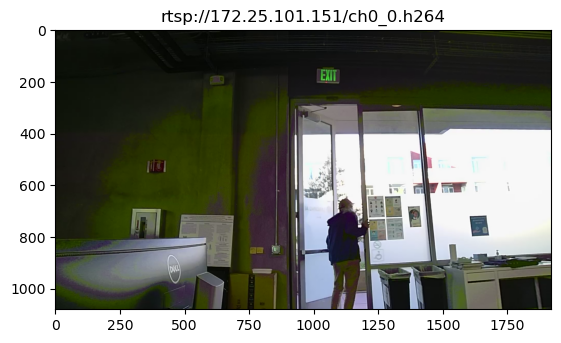

In [9]:
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image

vcap = cv2.VideoCapture(camera_url)
if not vcap.isOpened():
    print("Cannot open camera")
    exit()

# Capture frame-by-frame
ret, frame = vcap.read()
# if frame is read correctly ret is True
if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    exit()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# show camera frame
plt.imshow(frame)
plt.title(camera_url)
plt.show()

# When everything done, release the capture
vcap.release()
cv2.destroyAllWindows()

In [10]:
from landingai.predict import Predictor
from landingai.visualize import draw_bboxes
        
predictor = Predictor("c0791de7-66e3-4970-9a87-064e5e3b07ee", api_key, api_secret)

# frame = cv2.imread(r"/Users/william/Sync/Landing/Datasets/debris/cereal_1.jpg")
results = predictor.predict(frame)
results
# print(results)


[{'id': '00c13fc2-0065-453e-b081-e502c6ab2d96',
  'label': 'Open',
  'confidence_score': 0.8230593204498291,
  'bboxes': {'xmin': 902, 'ymin': 265, 'xmax': 1237, 'ymax': 1080}}]